# Functions and installations

In [2]:
! pip install pydot
! pip install graphviz 
! pip install pyarrow
! pip install ann-visualizer
! pip install tensorflow 
! pip install catboost
! pip install lightgbm
! pip install streamlit
! pip uninstall protobuf
! pip install protobuf

'\n! pip install pydot\n! pip install graphviz \n! pip install pyarrow\n! pip install ann-visualizer\n! pip install tensorflow \n! pip install catboost\n! pip install lightgbm\n! pip install streamlit\n! pip uninstall protobuf\n! pip install protobuf\n'

# Import 

In [2]:
# для обработки данных
import joblib
import numpy as np 
import pandas as pd
import pyarrow
import pydot 
# для работы с переменными и компонентами
from sklearn.decomposition import FactorAnalysis, PCA
from pandas.plotting import scatter_matrix
import time
from scipy.stats import pearsonr
from tensorflow.keras.callbacks import EarlyStopping
# для построения моделей
from typing import List
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_auc_score
from keras.utils import plot_model
from tensorflow.keras.layers import GRU, Dense
import tqdm
# для визуализации
import matplotlib.pyplot as plt
from ann_visualizer.visualize import ann_viz
import seaborn as sns
import graphviz
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import random
## 
import gc
import os
import sys
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score

import catboost as cb
import lightgbm as lgb

# **1. Анализ  и обработка данных**


---


**Раздел включает в себя:**
* предварительная обработка данных;
* разведочный анализ данных;
* балансировка данных;
* One-hot encoding;

Файл содержит $60$ переменных:

| Переменные |
| --- |
rn – порядковый номер кредитного продукта в кредитной истории
pre_since_opened – дней с даты открытия кредита до даты сбора данных
pre_since_confirmed – дней с даты подтверждения информации по кредиту до даты сбора данных
pre_pterm – плановое количество дней с даты открытия кредита до даты закрытия
pre_fterm – фактическое количество дней с даты открытия кредита до даты закрытия
pre_till_pclose – плановое количество дней с даты сбора данных до даты закрытия кредита
pre_till_fclose – фактическое количество дней с даты сбора данных до даты закрытия кредита
pre_loans_credit_limit – кредитный лимит
pre_loans_next_pay_summ – сумма следующего платежа по кредиту
pre_loans_outstanding – оставшаяся невыплаченная сумма кредита
pre_loans_total_overdue – текущая просроченная задолженность
pre_loans_max_overdue_sum – максимальная просроченная задолженность
pre_loans_credit_cost_rate – полная стоимость кредита
pre_loans5 – число просрочек до 5 дней
pre_loans530 – число просрочек от 5 до 30 дней
pre_loans3060 – число просрочек от 30 до 60 дней
pre_loans6090 – число просрочек от 60 до 90 дней
pre_loans90 – число просрочек более, чем на 90 дней
is_zero_loans_5 – флаг: нет просрочек до 5 дней
is_zero_loans_530 – флаг: нет просрочек от 5 до 30 дней
is_zero_loans_3060 – флаг: нет просрочек от 30 до 60 дней
is_zero_loans_6090 – флаг: нет просрочек от 60 до 90 дней
is_zero_loans90 – флаг: нет просрочек более, чем на 90 дней
pre_util – отношение оставшейся невыплаченной суммы кредита к кредитному лимиту
pre_over2limit – отношение текущей просроченной задолженности к кредитному лимиту
pre_maxover2limit – отношение максимальной просроченной задолженности к кредитному лимиту
is_zero_util – флаг: отношение оставшейся невыплаченной суммы кредита к кредитному лимиту равняется 0
is_zero_over2limit – флаг: отношение текущей просроченной задолженности к кредитному лимиту равняется 0
is_zero_maxover2limit – флаг: отношенение максимальной просроченной задолженности к кредитному лимиту равняется 0
enc_paym_{0..n} – статусы ежемесячных платежей за последние n месяцев
enc_loans_account_holder_type – тип отношения к кредиту
enc_loans_credit_status – статус кредита
enc_loans_account_cur – валюта кредита
enc_loans_credit_type – тип кредита
pclose_flag – флаг: плановое количество дней с даты открытия кредита до даты закрытия не определено
fclose_flag – флаг: фактическое количество дней с даты открытия кредита до даты закрытия не определено

## 1.1 Балансировка данных

In [3]:
flag = pd.read_csv('C:\\Users\\Tseh\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\train_target.csv') 
flag['flag'].value_counts() # размерность данных

0    2893558
1     106442
Name: flag, dtype: int64

In [166]:
df0 = pd.read_parquet('C:\\Users\\Tseh\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\train_data\\train_data_7.pq') 
df0['flag'].value_counts() # размерность данных

(2222245, 61)

In [167]:
merged_thing = pd.merge(credit_train, credit_test, on='id')

In [168]:
merged_thing = merged_thing[merged_thing['flag'] == 1]
merged_thing['flag'].value_counts()

1    80096
Name: flag, dtype: int64

In [227]:
credit['flag'].value_counts()

0    1917618
1     879809
Name: flag, dtype: int64

In [6]:
credit1 = pd.concat([credit_test, credit_train], ignore_index=True)
credit1['flag'].value_counts()

0    1027059
1    1027059
Name: flag, dtype: int64

In [213]:
credit1 = pd.concat([credit, credit1], ignore_index=True)
credit1['flag'].value_counts()

0    1917618
1    1759618
Name: flag, dtype: int64

In [209]:
credit = credit[credit['flag'] == 1]

In [217]:
# Create a list of indices from the DataFrame
indices = balanced_data.index.tolist()

# Shuffle the indices
random.shuffle(indices)

# Reorder the DataFrame based on the shuffled indices
df_shuffled = balanced_data.loc[indices].reset_index(drop=True)

In [218]:
df_shuffled.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,flag
0,132608,2,15,17,7,2,9,1,13,2,...,3,3,4,1,3,1,1,0,0,0
1,167463,8,13,6,6,1,0,4,13,2,...,1,2,2,1,2,3,1,0,0,0
2,1036395,12,12,9,14,7,10,4,0,0,...,3,3,4,1,2,4,1,0,0,1
3,71263,1,8,14,2,14,9,1,10,2,...,3,3,4,1,3,4,1,0,0,0
4,2842,3,8,7,9,0,9,1,17,2,...,3,3,4,1,3,4,1,0,0,0


In [219]:
df_shuffled['flag'].value_counts()

0    1759618
1    1759618
Name: flag, dtype: int64

In [126]:
df_shuffled.to_csv('C:\\Users\\Tseh\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\train_data_shuffled.csv', index=False)

In [24]:
credit = pd.read_csv('C:\\Users\\Tseh\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\train_target_balanced.csv') 
credit.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,flag
0,0,1,18,9,2,3,16,10,11,3,...,3,3,4,1,3,4,1,0,0,0
1,0,2,18,9,14,14,12,12,0,3,...,0,0,4,1,3,4,1,0,0,0
2,0,3,18,9,4,8,1,11,11,0,...,0,0,4,1,2,3,1,1,1,0
3,0,4,4,1,9,12,16,7,12,2,...,3,3,4,1,3,1,1,0,0,0
4,0,5,5,12,15,2,11,12,10,2,...,3,3,4,1,3,4,1,0,0,0


In [215]:
credit_data = credit 
# Separate the rows with flag=0 and flag=1
flag_0_data = credit_data[credit_data['flag'] == 0]
flag_1_data = credit_data[credit_data['flag'] == 1]

# Sample equal number of rows from both flag_0_data and flag_1_data
num_samples = min(len(flag_0_data), len(flag_1_data))
flag_0_sampled = flag_0_data.sample(n=num_samples, random_state=42)
flag_1_sampled = flag_1_data.sample(n=num_samples, random_state=42)

# Concatenate the sampled dataframes
balanced_data = pd.concat([flag_0_sampled, flag_1_sampled])

# Shuffle the rows in the new dataset
balanced_data = balanced_data.sample(frac=1, random_state=42)

# Reset the index of the new dataset
balanced_data.reset_index(drop=True, inplace=True)

In [216]:
balanced_data['flag'].value_counts()

1    1759618
0    1759618
Name: flag, dtype: int64

In [186]:
balanced_data.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,flag
0,183146,4,14,3,9,12,6,13,6,2,...,3,3,4,1,3,1,1,0,0,0
1,176702,4,18,11,2,10,16,12,0,2,...,3,3,4,1,3,4,1,0,0,0
2,2299277,1,13,8,17,14,5,7,11,2,...,0,0,1,1,3,4,1,0,0,1
3,234812,2,19,10,3,5,7,2,4,2,...,3,3,4,1,3,3,1,0,0,0
4,235311,9,6,9,16,9,3,10,19,6,...,3,3,4,1,3,4,1,0,0,0


In [137]:
balanced_data.to_csv('C:\\Users\\Tseh\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\train_data_balanced_data.csv', index=False)

## 1.2 Smote

In [228]:
from imblearn.over_sampling import SMOTE

X = credit.drop(['id', 'flag'], axis=1) # Features
y = credit['flag'] # Target variable

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create a balanced DataFrame if needed
balanced_df = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.Series(y_balanced, name='label')], axis=1)

In [229]:
balanced_df

,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,...,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,label
0,1,18,9,2,3,16,10,11,3,3,...,3,3,4,1,3,4,1,0,0,0
1,2,18,9,14,14,12,12,0,3,3,...,0,0,4,1,3,4,1,0,0,0
2,3,18,9,4,8,1,11,11,0,5,...,0,0,4,1,2,3,1,1,1,0
3,4,4,1,9,12,16,7,12,2,3,...,3,3,4,1,3,1,1,0,0,0
4,5,5,12,15,2,11,12,10,2,3,...,3,3,4,1,3,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835231,15,6,13,3,3,2,5,12,2,3,...,3,3,4,1,3,1,1,0,0,1
3835232,14,19,10,14,8,10,11,0,0,1,...,3,3,4,1,2,4,1,0,1,1
3835233,1,16,7,0,1,5,9,2,2,3,...,0,0,1,1,3,2,1,0,0,1
3835234,5,17,2,3,3,16,12,18,2,3,...,3,3,4,1,3,5,1,0,0,1


In [232]:
balanced_df['label'].value_counts()

0    1917618
1    1917618
Name: label, dtype: int64

In [66]:
credit.isnull().sum().sum()

0

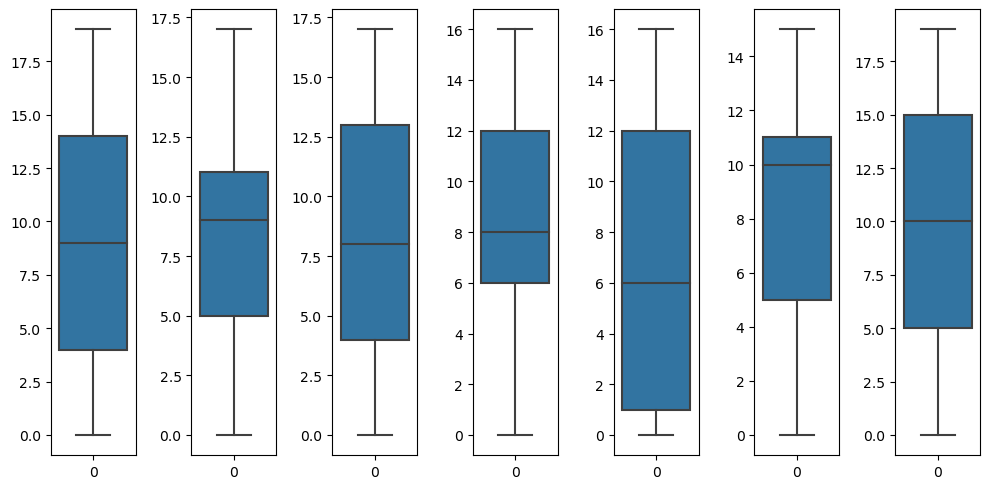

In [58]:
# Create a list of column names to plot
cols = credit.columns.to_list()[2:9]

# Create a figure with subplots
fig, axs = plt.subplots(1, 7, figsize=(10, 5))

# Loop through the columns and create a boxplot for each one
for i, colname in enumerate(cols):
    sns.boxplot(credit[colname], ax=axs[i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


## 1.3 Dataset import

In [13]:
# Calculate the index atlen(credit))

# Split the dataset into two separate datasets
credit_train = credit[:split_index]
credit_test = credit[split_index:]

print(credit_train.shape)
print(credit_test.shape)

(1643294, 460)
(410824, 460)


In [14]:
credit_train.to_csv('C:\\Users\\Tseh\\Desktop\\Credit scoring\\credit_train_encoded.csv', index=False)
credit_test.to_csv('C:\\Users\\Tseh\\Desktop\\Credit scoring\\credit_test_encoded.csv', index=False)

In [3]:
print(credit_train.shape)
print(credit_test.shape)

(1643294, 460)
(410824, 460)


In [5]:
credit_train = pd.read_csv('C:\\Users\\Tseh\\Desktop\\Credit scoring\\credit_train_encoded.csv') 
credit_test = pd.read_csv('C:\\Users\\Tseh\\Desktop\\Credit scoring\\credit_test_encoded.csv')

In [ ]:
credit_train credit_test

## 1.4 One-hot-encoding

In [8]:
target_variable = credit['flag']
id_variable = credit['id']
credit.drop(['flag', 'id'], axis=1, inplace=True)
credit.head()

,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,10,3,5,4,3,16,12,19,2,3,...,3,3,3,4,1,3,5,1,0,0
1,6,1,6,4,2,1,15,12,1,3,...,3,3,3,4,1,3,3,1,1,0
2,6,0,13,11,15,16,5,7,2,3,...,3,3,3,4,1,3,4,1,0,0
3,3,6,6,16,11,3,5,10,1,3,...,3,3,3,4,1,3,4,1,0,0
4,3,8,5,9,8,4,11,5,2,3,...,0,0,0,1,1,5,4,1,0,1


In [9]:
import pandas as pd

# assuming df1 is your dataframe
# create a sparse one-hot-encoded dataframe
credit = pd.get_dummies(credit, columns=credit.columns, sparse=False)

# print the encoded dataframe
credit.head()

,rn_1,rn_2,rn_3,rn_4,rn_5,rn_6,rn_7,rn_8,rn_9,rn_10,...,enc_loans_credit_type_6,enc_loans_credit_type_7,enc_loans_account_cur_0,enc_loans_account_cur_1,enc_loans_account_cur_2,enc_loans_account_cur_3,pclose_flag_0,pclose_flag_1,fclose_flag_0,fclose_flag_1
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [10]:
credit['flag'] = target_variable
credit.insert(loc=0, column='id', value=id_variable)
credit.head()

,id,rn_1,rn_2,rn_3,rn_4,rn_5,rn_6,rn_7,rn_8,rn_9,...,enc_loans_credit_type_7,enc_loans_account_cur_0,enc_loans_account_cur_1,enc_loans_account_cur_2,enc_loans_account_cur_3,pclose_flag_0,pclose_flag_1,fclose_flag_0,fclose_flag_1,flag
0,902392,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1,18806,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,182093,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,102750,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,63891,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [11]:
credit.shape

(2054118, 460)

In [12]:
credit['flag'].value_counts()

1    1027059
0    1027059
Name: flag, dtype: int64

## 1.5 One-hot encoding for divided

In [4]:
target_variable = credit_train['flag']
id_variable = credit_train['id']
credit_train.drop(['flag', 'id'], axis=1, inplace=True)
credit_train.head()

,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,10,3,5,4,3,16,12,19,2,3,...,3,3,3,4,1,3,5,1,0,0
1,6,1,6,4,2,1,15,12,1,3,...,3,3,3,4,1,3,3,1,1,0
2,6,0,13,11,15,16,5,7,2,3,...,3,3,3,4,1,3,4,1,0,0
3,3,6,6,16,11,3,5,10,1,3,...,3,3,3,4,1,3,4,1,0,0
4,3,8,5,9,8,4,11,5,2,3,...,0,0,0,1,1,5,4,1,0,1


In [5]:
import pandas as pd

# assuming df1 is your dataframe
# create a sparse one-hot-encoded dataframe
credit_train = pd.get_dummies(credit_train, columns=credit_train.columns, sparse=False)

# print the encoded dataframe
credit_train.head()

,rn_1,rn_2,rn_3,rn_4,rn_5,rn_6,rn_7,rn_8,rn_9,rn_10,...,enc_loans_credit_type_6,enc_loans_credit_type_7,enc_loans_account_cur_0,enc_loans_account_cur_1,enc_loans_account_cur_2,enc_loans_account_cur_3,pclose_flag_0,pclose_flag_1,fclose_flag_0,fclose_flag_1
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [6]:
credit_train['flag'] = target_variable
credit_train.insert(loc=0, column='id', value=id_variable)
credit_train.head()

,id,rn_1,rn_2,rn_3,rn_4,rn_5,rn_6,rn_7,rn_8,rn_9,...,enc_loans_credit_type_7,enc_loans_account_cur_0,enc_loans_account_cur_1,enc_loans_account_cur_2,enc_loans_account_cur_3,pclose_flag_0,pclose_flag_1,fclose_flag_0,fclose_flag_1,flag
0,902392,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1,18806,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,182093,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,102750,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,63891,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [116]:
credit_train.shape

(1643294, 459)

# Import all data

In [2]:
credit_train = pd.read_csv('C:\\Users\\Tseh\\Desktop\\Credit scoring\\credit_train_encoded.csv') 
credit_test = pd.read_csv('C:\\Users\\Tseh\\Desktop\\Credit scoring\\credit_test_encoded.csv') 

In [50]:
credit_train = pd.read_csv('C:\\Users\\Tseh\\Desktop\\Credit scoring\\credit_train.csv') 
credit_test = pd.read_csv('C:\\Users\\Tseh\\Desktop\\Credit scoring\\credit_test.csv')

In [10]:
credit_test = pd.read_csv('C:\\Users\\Tseh\\Desktop\\Credit scoring\\credit_test_encoded.csv') 

# 2. Обучение методами классического МО

---


**Раздел включает в себя:**
* Catboost;
* Feature importance;
* LightGBM;
* Logistic regression;
* Random forest

## 2.1 Train Model: Catboost + CV

In [43]:
data = credit_train
X = data.drop(['id', 'flag'], axis=1)  # Features
y = data['flag']  # Target variable

X_train = X
y_train = y

In [38]:
data = credit_test
X_test = data.drop(['id', 'flag'], axis=1) # Features
y_test = data['flag'] # Target variable

In [41]:
from catboost import CatBoostClassifier
# Initializing the CatBoostClassifier
model = CatBoostClassifier(iterations=100,  # Number of boosting iterations
                           learning_rate=0.1,  # Learning rate for gradient boosting
                           depth=6,  # Depth of the trees
                           loss_function='MultiClass',  # Loss function for multi-class classification
                           random_seed=42)

# Training the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose_eval=10, use_best_model=True, plot=False)

0:	learn: 0.6879022	test: 0.6945860	best: 0.6945860 (0)	total: 207ms	remaining: 20.5s
10:	learn: 0.6599870	test: 0.7168311	best: 0.6942135 (1)	total: 2.27s	remaining: 18.3s
20:	learn: 0.6464951	test: 0.7476741	best: 0.6942135 (1)	total: 4.3s	remaining: 16.2s
30:	learn: 0.6363178	test: 0.7519726	best: 0.6942135 (1)	total: 6.28s	remaining: 14s
40:	learn: 0.6301502	test: 0.7516873	best: 0.6942135 (1)	total: 8.24s	remaining: 11.9s
50:	learn: 0.6252272	test: 0.7474184	best: 0.6942135 (1)	total: 10.2s	remaining: 9.81s
60:	learn: 0.6207083	test: 0.7546701	best: 0.6942135 (1)	total: 12.2s	remaining: 7.79s
70:	learn: 0.6176863	test: 0.7519882	best: 0.6942135 (1)	total: 14.2s	remaining: 5.78s
80:	learn: 0.6140466	test: 0.7881273	best: 0.6942135 (1)	total: 16.2s	remaining: 3.8s
90:	learn: 0.6104270	test: 0.8024028	best: 0.6942135 (1)	total: 18.2s	remaining: 1.8s
99:	learn: 0.6078016	test: 0.8017910	best: 0.6942135 (1)	total: 20.1s	remaining: 0us

bestTest = 0.6942135476
bestIteration = 1

Shrink 

In [48]:
import time
import numpy as np
from sklearn.model_selection import KFold
import catboost as cb

cv = KFold(n_splits=5, random_state=100, shuffle=True)

oof = np.zeros(len(y_train))
train_preds = np.zeros(len(y_train))
models = []

tree_params = {
    'max_depth': 5,
    'eval_metric': 'AUC',
    'loss_function': 'Logloss',
    'random_state': 100,
    'l2_leaf_reg': 3,
}

for fold_, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
    print(f'Training with fold {fold_} started.')
    
    start_time = time.time()  # Start measuring time
    
    model = cb.CatBoostClassifier(**tree_params)    
    
    train, val = X.iloc[train_idx], X.iloc[val_idx]
    train_target, val_target = y[train_idx], y[val_idx]

    train_pool = cb.Pool(train, train_target)
    val_pool = cb.Pool(val, val_target)
    
    model.fit(train_pool, eval_set=[val_pool], early_stopping_rounds=100, verbose_eval=50, use_best_model=True, plot=False)
    
    elapsed_time = time.time() - start_time  # Calculate elapsed time
    
    oof[val_idx] = model.predict_proba(val)[:, 1]
    train_preds[train_idx] += model.predict_proba(train)[:, 1] / (cv.n_splits-1)
    models.append(model)
    
    print(f'Training with fold {fold_} completed. Elapsed time: {elapsed_time:.2f} seconds.')

Training with fold 1 started.
0:	test: 0.6118383	best: 0.6118383 (0)	total: 122ms	remaining: 2m 2s
50:	test: 0.6772458	best: 0.6772458 (50)	total: 5.66s	remaining: 1m 45s
100:	test: 0.6945795	best: 0.6945795 (100)	total: 11.1s	remaining: 1m 38s
150:	test: 0.7043401	best: 0.7043401 (150)	total: 16.5s	remaining: 1m 32s
200:	test: 0.7115569	best: 0.7115569 (200)	total: 22s	remaining: 1m 27s
250:	test: 0.7177277	best: 0.7177277 (250)	total: 27.5s	remaining: 1m 21s
300:	test: 0.7236514	best: 0.7236514 (300)	total: 33s	remaining: 1m 16s
350:	test: 0.7285031	best: 0.7285031 (350)	total: 38.6s	remaining: 1m 11s
400:	test: 0.7331371	best: 0.7331371 (400)	total: 44s	remaining: 1m 5s
450:	test: 0.7370273	best: 0.7370273 (450)	total: 49.4s	remaining: 1m
500:	test: 0.7405593	best: 0.7405593 (500)	total: 54.5s	remaining: 54.3s
550:	test: 0.7435186	best: 0.7435186 (550)	total: 59.6s	remaining: 48.6s
600:	test: 0.7462370	best: 0.7462370 (600)	total: 1m 4s	remaining: 43.1s
650:	test: 0.7487309	best: 0.

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = models[0].predict(X_test)

# Convert probabilities to class predictions
#y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]
y_pred_class = y_pred
# Evaluate classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_class)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print("Train roc-auc: ", roc_auc)

Accuracy: 0.6909747239693883
Precision: 0.7048210372534697
Recall: 0.6574583753108771
F1 score: 0.6803163723443634
Train roc-auc:  0.6909837005281432


In [24]:
import joblib
joblib.dump(models[4], 'C:\\Users\\Tseh\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\ML models\\model_catboost.joblib')

['C:\\Users\\Tseh\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\ML models\\model_catboost.joblib']

## 2.2 Feature importance

In [56]:
features = [x for x in credit.columns if x not in ['id', 'flag']]
importances = np.zeros(len(features))
for model in models:
    importances += model.feature_importances_ / len(models)

In [57]:
def plot_feature_importance(feature_names, feature_scores, top_feats=20, title='Importance', x_label='Importance', 
                            y_label='Features'):
    tuples = [(name, round(score, 3)) for name, score in zip(feature_names, feature_scores)]
    tuples = sorted(tuples, key=lambda x: x[1])[-top_feats:]
    
    labels, values = zip(*tuples)
    _, ax = plt.subplots(1, 1, figsize=(10, 8))
    ylocs = np.arange(len(values))
    
    ax.barh(ylocs, values, align='center', height=0.4)
    for x, y in zip(values, ylocs):
        ax.text(x + 1, y, x, va='center')
        
    ax.set_yticks(ylocs)
    ax.set_yticklabels(labels)
    xlim = (0, max(values) * 1.1)
    ax.set_xlim(xlim)
    ylim = (-1, len(values))
    ax.set_ylim(ylim)
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True)

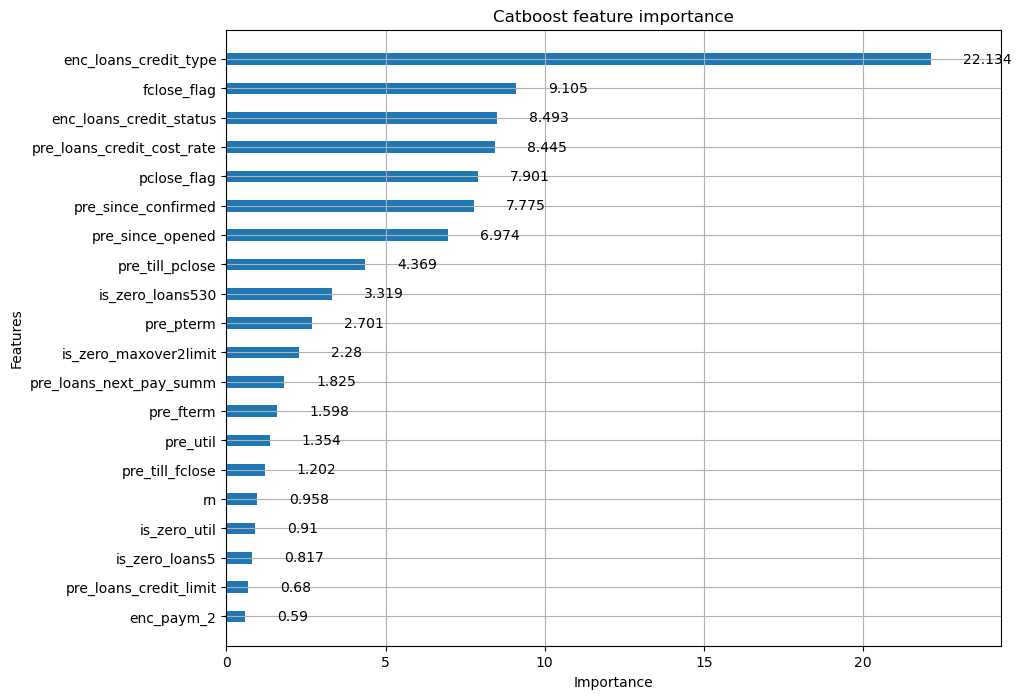

In [58]:
plot_feature_importance(features, importances, top_feats=20, title='Catboost feature importance', 
                        x_label='Importance')

In [59]:
tuples = [(name, round(score, 3)) for name, score in zip(features, importances)]
tuples = sorted(tuples, key=lambda x: x[1])

top_selected_feats = [x[0] for x in tuples if x[1] >= np.median(importances)]

In [60]:
selected_features = [x for x in credit.columns if x not in ['id', 'flag'] and x in top_selected_feats]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [61]:
cv = KFold(n_splits=5, random_state=100, shuffle=True)

oof = np.zeros(len(y_train))
train_preds = np.zeros(len(y_train))

models = []


tree_params = {
    'max_depth': 5,
    'eval_metric': 'AUC',
    'loss_function': 'Logloss',
    'random_state': 100,
    'l2_leaf_reg': 1,
}

for fold_, (train_idx, val_idx) in enumerate(cv.split(X_train_selected, y_train), 1):
    print(f'Training with fold {fold_} started.')
    model = cb.CatBoostClassifier(**tree_params)    
    
    train, val = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    train_target, val_target = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    train_pool = cb.Pool(train, train_target)
    val_pool = cb.Pool(val, val_target)
    
    model.fit(train_pool, eval_set=[val_pool], early_stopping_rounds=100, verbose_eval=50, use_best_model=True, plot=False)

    
    oof[val_idx] = model.predict_proba(val)[:, 1]
    
    train_preds[train_idx] += model.predict_proba(train)[:, 1] / (cv.n_splits-1)
    models.append(model)
    print(f'Training with fold {fold_} completed.')

Training with fold 1 started.
0:	test: 0.6069588	best: 0.6069588 (0)	total: 143ms	remaining: 2m 22s
50:	test: 0.6622980	best: 0.6622980 (50)	total: 8.16s	remaining: 2m 31s
100:	test: 0.6794656	best: 0.6794656 (100)	total: 16.4s	remaining: 2m 26s
150:	test: 0.6924865	best: 0.6924865 (150)	total: 24.7s	remaining: 2m 19s
200:	test: 0.6993007	best: 0.6993007 (200)	total: 33.1s	remaining: 2m 11s
250:	test: 0.7049260	best: 0.7049260 (250)	total: 41.4s	remaining: 2m 3s
300:	test: 0.7094273	best: 0.7094273 (300)	total: 50s	remaining: 1m 56s
350:	test: 0.7133376	best: 0.7133376 (350)	total: 58.5s	remaining: 1m 48s
400:	test: 0.7171654	best: 0.7171654 (400)	total: 1m 6s	remaining: 1m 40s
450:	test: 0.7207048	best: 0.7207048 (450)	total: 1m 15s	remaining: 1m 31s
500:	test: 0.7238051	best: 0.7238051 (500)	total: 1m 23s	remaining: 1m 23s
550:	test: 0.7263929	best: 0.7263929 (550)	total: 1m 31s	remaining: 1m 14s
600:	test: 0.7286562	best: 0.7286562 (600)	total: 1m 40s	remaining: 1m 6s
650:	test: 0.7

In [62]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Make predictions on the test set
y_pred = models[4].predict(X_test_selected)

# Convert probabilities to class predictions
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]

# Evaluate classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_class)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print("Train roc-auc: ", roc_auc)

Accuracy: 0.7386208055250713
Precision: 0.728782762745484
Recall: 0.2727633361102138
F1 score: 0.39695670103092784
Train roc-auc:  0.6129996264864528


<font size="12">DO SCALE DATA FOR LR!</font>

## 2.3 Train Model: LightGBM + CV

In [3]:
data = credit_train
X = data.drop(['id', 'flag'], axis=1)  # Features
y = data['flag']  # Target variable

# scale the data
scaler = StandardScaler(with_mean=False)
X = scaler.fit_transform(X)

X_train = X
y_train = y

In [46]:
train_data_target = credit_train
train_data_target

,id,rn_1,rn_2,rn_3,rn_4,rn_5,rn_6,rn_7,rn_8,rn_9,...,enc_loans_credit_type_7,enc_loans_account_cur_0,enc_loans_account_cur_1,enc_loans_account_cur_2,enc_loans_account_cur_3,pclose_flag_0,pclose_flag_1,fclose_flag_0,fclose_flag_1,flag
0,902392,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1,18806,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,182093,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,102750,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,63891,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643289,258697,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
1643290,73353,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1643291,897833,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1643292,2476372,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1


In [47]:
feature_cols = list(train_data_target.columns.values)
feature_cols.remove("id"), feature_cols.remove("flag")
len(feature_cols)

458

In [49]:
import time
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Define hyperparameters for LightGBM classifier
tree_params = {
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.1,
    "max_depth": 13,
    "reg_lambda": 1,
    "num_leaves": 64,
    "n_jobs": 5,
    "n_estimators": 2000
}

# Perform K-fold cross-validation with LightGBM classifier
cv = KFold(n_splits=5, random_state=100, shuffle=True)
oof = np.zeros(len(y_train))
train_preds = np.zeros(len(y_train))
models = []

for fold_, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
    print(f"Training with fold {fold_} started")
    lgb_model = lgb.LGBMClassifier(**tree_params)
    train_X, val_X = X_train.iloc[train_idx], X_train.iloc[val_idx]
    train_y, val_y = y_train.iloc[train_idx], y_train.iloc[val_idx]

    start_time = time.time()
    lgb_model.fit(train_X, train_y, eval_set=[(val_X, val_y)], 
                  callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=50)])
    end_time = time.time()

    oof[val_idx] = lgb_model.predict_proba(val_X)[:, 1]
    train_preds[train_idx] += lgb_model.predict_proba(train_X)[:, 1] / (cv.n_splits-1)
    models.append(lgb_model)
    print(f"Training with fold {fold_} completed in {end_time-start_time:.2f} seconds")

Training with fold 1 started
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.761106
[100]	valid_0's auc: 0.780582
[150]	valid_0's auc: 0.789211
[200]	valid_0's auc: 0.794085
[250]	valid_0's auc: 0.797892
[300]	valid_0's auc: 0.800991
[350]	valid_0's auc: 0.803833
[400]	valid_0's auc: 0.805961
[450]	valid_0's auc: 0.807901
[500]	valid_0's auc: 0.809624
[550]	valid_0's auc: 0.81147
[600]	valid_0's auc: 0.812865
[650]	valid_0's auc: 0.813986
[700]	valid_0's auc: 0.814947
[750]	valid_0's auc: 0.816552
[800]	valid_0's auc: 0.817705
[850]	valid_0's auc: 0.818528
[900]	valid_0's auc: 0.81932
[950]	valid_0's auc: 0.820066
[1000]	valid_0's auc: 0.821349
[1050]	valid_0's auc: 0.821913
[1100]	valid_0's auc: 0.822457
[1150]	valid_0's auc: 0.823111
[1200]	valid_0's auc: 0.823622
[1250]	valid_0's auc: 0.824185
[1300]	valid_0's auc: 0.824732
[1350]	valid_0's auc: 0.825271
[1400]	valid_0's auc: 0.825781
[1450]	valid_0's auc: 0.826255
[1500]	valid_0's auc: 0.826635
[1

In [7]:
import joblib
joblib.dump(models[4], 'C:\\Users\\Tseh\\Desktop\\Credit scoring\\Models\\\\model_gb.joblib')

['C:\\Users\\Tseh\\Desktop\\Credit scoring\\Models\\\\model_gb.joblib']

In [8]:
X_test = credit_test.drop(['id', 'flag'], axis=1) # Features
y_test = credit_test['flag'] # Target variable

In [50]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Make predictions on the test set
y_pred = models[4].predict(X_test)

# Convert probabilities to class predictions
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]

# Evaluate classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_class)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print("Train roc-auc: ", roc_auc)

Accuracy: 0.7487853679434502
Precision: 0.7670528141060461
Recall: 0.7147765821275436
F1 score: 0.7399925931711053
Train roc-auc:  0.7487944763898138


In [51]:
precision = 0.723  # Precision value
recall = 0.667  # Recall value

f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score:", f1_score)

F1 Score: 0.6938719424460431


In [15]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Make predictions on the test set
y_pred = models[4].predict(X_train)

# Convert probabilities to class predictions
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]

# Evaluate classification metrics
accuracy = accuracy_score(y_train, y_pred_class)
precision = precision_score(y_train, y_pred_class)
recall = recall_score(y_train, y_pred_class)
f1 = f1_score(y_train, y_pred_class)
roc_auc = roc_auc_score(y_train, y_pred_class)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print("Train roc-auc: ", roc_auc)

Accuracy: 0.8064302553286266
Precision: 0.8266358389902638
Recall: 0.7754676287013506
F1 score: 0.8002346250270045
Train roc-auc:  0.8064281828687024


## 2.4 Train Model: Logistic regression + CV

In [52]:
data = credit_train
X = data.drop(['id', 'flag'], axis=1)  # Features
y = data['flag']  # Target variable

# scale the data
#scaler = StandardScaler(with_mean=False)
#X = scaler.fit_transform(X)

X_train = X
y_train = y

In [21]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

train_data_target = credit_train
feature_cols = list(train_data_target.columns.values)
feature_cols.remove("id"), feature_cols.remove("flag")


# Define hyperparameters for logistic regression
logreg_params = {
    "penalty": "l2",
    "C": 1.0,
    "solver": "lbfgs",
    "max_iter": 1000,
    "n_jobs": 5
}

# Perform K-fold cross-validation with logistic regression
cv = KFold(n_splits=5, random_state=100, shuffle=True)
oof = np.zeros(len(y_train))
train_preds = np.zeros(len(y_train))
models = []

for fold_, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
    print(f"Training with fold {fold_} started")
    logreg_model = LogisticRegression(**logreg_params)
    train_X, val_X = X_train.iloc[train_idx], X_train.iloc[val_idx]
    train_y, val_y = y_train.iloc[train_idx], y_train.iloc[val_idx]

    start_time = time.time()
    logreg_model.fit(train_X, train_y)
    end_time = time.time()

    oof[val_idx] = logreg_model.predict_proba(val_X)[:, 1]
    train_preds[train_idx] += logreg_model.predict_proba(train_X)[:, 1] / (cv.n_splits-1)
    models.append(logreg_model)
    print(f"Training with fold {fold_} completed in {end_time-start_time:.2f} seconds")

Training with fold 1 started
Training with fold 1 completed in 8728.13 seconds
Training with fold 2 started
Training with fold 2 completed in 7212.81 seconds
Training with fold 3 started
Training with fold 3 completed in 8397.76 seconds
Training with fold 4 started
Training with fold 4 completed in 8510.85 seconds
Training with fold 5 started
Training with fold 5 completed in 8534.08 seconds


In [86]:
joblib.dump(models[4], 'C:\\Users\\Tseh\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\ML models\\model_log_reg.joblib')

['C:\\Users\\Tseh\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\ML models\\model_log_reg.joblib']

In [53]:
data = credit_test
X_test = data.drop(['id', 'flag'], axis=1) # Features
y_test = data['flag'] # Target variable

In [23]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Make predictions on the test set
y_pred = models[0].predict(X_test)

# Convert probabilities to class predictions
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]

# Evaluate classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_class)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print("Train roc-auc: ", roc_auc)

Accuracy: 0.64134276478492
Precision: 0.6472233198577464
Recall: 0.6217932806728088
F1 score: 0.634253501828174
Train roc-auc:  0.6413480006503942


In [24]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Make predictions on the test set
y_pred = models[1].predict(X_test)

# Convert probabilities to class predictions
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]

# Evaluate classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_class)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print("Train roc-auc: ", roc_auc)

Accuracy: 0.6410555371643332
Precision: 0.6469497365220916
Recall: 0.6214233915908638
F1 score: 0.6339297018323004
Train roc-auc:  0.6410607951687184


In [25]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Make predictions on the test set
y_pred = models[2].predict(X_test)

# Convert probabilities to class predictions
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]

# Evaluate classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_class)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print("Train roc-auc: ", roc_auc)

Accuracy: 0.641174809650848
Precision: 0.6467519072970227
Recall: 0.6225963293375578
F1 score: 0.6344442791251302
Train roc-auc:  0.6411797854559934


In [26]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Make predictions on the test set
y_pred = models[3].predict(X_test)

# Convert probabilities to class predictions
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]

# Evaluate classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_class)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print("Train roc-auc: ", roc_auc)

Accuracy: 0.6412015851070044
Precision: 0.6469632389418161
Recall: 0.6220220278682221
F1 score: 0.6342475304766844
Train roc-auc:  0.6412067218963428


In [27]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Make predictions on the test set
y_pred = models[4].predict(X_test)

# Convert probabilities to class predictions
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]

# Evaluate classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_class)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print("Train roc-auc: ", roc_auc)

Accuracy: 0.6411553365918252
Precision: 0.646908455873048
Recall: 0.6219976930601995
F1 score: 0.6342085543717217
Train roc-auc:  0.6411604675120969


## 2.5 Train Model: Random forest + CV

In [35]:
data = credit_train
X = data.drop(['id', 'flag'], axis=1)  # Features
y = data['flag']  # Target variable


X_train = X
y_train = y

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import time


# Set up Random Forest classifier
rf_params = {
    "n_estimators": 1000,
    "max_depth": 5,
    "min_samples_split": 10,
    "min_samples_leaf": 5,
    "random_state": 42
}
rf = RandomForestClassifier(**rf_params)

# Set up K-fold cross-validation
cv = KFold(n_splits=5, random_state=100, shuffle=True)

# Perform K-fold cross-validation
oof = np.zeros(len(y_train))
train_preds = np.zeros(len(y_train))
models = []
for fold_, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
    print(f"Training with fold {fold_} started")
    train_X, val_X = X_train.iloc[train_idx], X_train.iloc[val_idx]
    train_y, val_y = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Fit Random Forest classifier to training data
    start_time = time.time()
    rf.fit(train_X, train_y)
    end_time = time.time()

    # Generate predictions on validation data
    val_preds = rf.predict_proba(val_X)[:, 1]

    # Record out-of-fold predictions and model
    oof[val_idx] = val_preds
    train_preds[train_idx] += rf.predict_proba(train_X)[:, 1] / (cv.n_splits-1)
    models.append(rf)

    # Calculate and print AUC score for fold
    auc_score = roc_auc_score(val_y, val_preds)
    print(f"AUC score for fold {fold_}: {auc_score:.4f}")

    # Print time taken for the fold
    print(f"Time taken for fold {fold_}: {end_time - start_time:.2f} seconds")


Training with fold 1 started
AUC score for fold 1: 0.6521
Time taken for fold 1: 878.40 seconds
Training with fold 2 started
AUC score for fold 2: 0.6498
Time taken for fold 2: 889.91 seconds
Training with fold 3 started
AUC score for fold 3: 0.6482
Time taken for fold 3: 890.61 seconds
Training with fold 4 started
AUC score for fold 4: 0.6501
Time taken for fold 4: 899.06 seconds
Training with fold 5 started
AUC score for fold 5: 0.6518
Time taken for fold 5: 902.27 seconds


In [96]:
joblib.dump(models[4], 'C:\\Users\\Tseh\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\ML models\\model_random_forest.joblib')

['C:\\Users\\Tseh\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\ML models\\model_random_forest.joblib']

In [39]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for i in range(0, 5):
    # Make predictions on the test set
    y_pred = models[i].predict(X_test)

    # Convert probabilities to class predictions
    y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]

    # Evaluate classification metrics
    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    roc_auc = roc_auc_score(y_test, y_pred_class)

    # Print the results
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 score:', f1)
    print("Train roc-auc: ", roc_auc)


Accuracy: 0.6010116254162367
Precision: 0.6151811997937698
Recall: 0.5400721283709793
F1 score: 0.5751850469614977
Train roc-auc:  0.6010279466146252
Accuracy: 0.6010116254162367
Precision: 0.6151811997937698
Recall: 0.5400721283709793
F1 score: 0.5751850469614977
Train roc-auc:  0.6010279466146252
Accuracy: 0.6010116254162367
Precision: 0.6151811997937698
Recall: 0.5400721283709793
F1 score: 0.5751850469614977
Train roc-auc:  0.6010279466146252
Accuracy: 0.6010116254162367
Precision: 0.6151811997937698
Recall: 0.5400721283709793
F1 score: 0.5751850469614977
Train roc-auc:  0.6010279466146252
Accuracy: 0.6010116254162367
Precision: 0.6151811997937698
Recall: 0.5400721283709793
F1 score: 0.5751850469614977
Train roc-auc:  0.6010279466146252


# 3. Обучение нейронной сети

---


**Раздел включает в себя:**
* построение архитектуры и первичное обучение;
* оптимизация модели;
* оценка модели.

## 3.1 Построение архитектуры и первичное обучение

In [40]:
data = credit_train
X_train = data.drop(['id', 'flag'], axis=1) # Features
y_train = data['flag'] # Target variable

In [41]:
X_test = credit_test.drop(['id', 'flag'], axis=1) # Features
y_test = credit_test['flag'] # Target variable

In [43]:
# define the model
model = Sequential()


model.add(Dense(60, activation='relu', input_dim=458))
model.add(Dense(55, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# compile the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [44]:
# An early stop is created to prevent overfitting in the model.
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [45]:
import time

start_time = time.time()

model.fit(x=X_train, 
          y=y_train, 
          epochs=10,
          batch_size=64,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop]
          )

end_time = time.time()
training_time = end_time - start_time

print("Training time: {:.2f} seconds".format(training_time))

Epoch 1/10
25677/25677 [==============================] - 53s 2ms/step - loss: 0.5720 - accuracy: 0.6905 - val_loss: 0.5490 - val_accuracy: 0.7108
Epoch 2/10
25677/25677 [==============================] - 44s 2ms/step - loss: 0.5409 - accuracy: 0.7165 - val_loss: 0.5347 - val_accuracy: 0.7219
Epoch 3/10
25677/25677 [==============================] - 45s 2ms/step - loss: 0.5314 - accuracy: 0.7238 - val_loss: 0.5296 - val_accuracy: 0.7254
Epoch 4/10
25677/25677 [==============================] - 46s 2ms/step - loss: 0.5255 - accuracy: 0.7278 - val_loss: 0.5288 - val_accuracy: 0.7246
Epoch 5/10
25677/25677 [==============================] - 45s 2ms/step - loss: 0.5215 - accuracy: 0.7304 - val_loss: 0.5236 - val_accuracy: 0.7299
Epoch 6/10
25677/25677 [==============================] - 44s 2ms/step - loss: 0.5184 - accuracy: 0.7330 - val_loss: 0.5223 - val_accuracy: 0.7324
Epoch 7/10
25677/25677 [==============================] - 41s 2ms/step - loss: 0.5160 - accuracy: 0.7347 - val_loss: 0

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class predictions
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]

# Evaluate classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_class)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print("Train roc-auc: ", roc_auc)

12839/12839 [==============================] - 13s 1ms/step
Accuracy: 0.7437978307012248
Precision: 0.7550169734786215
Recall: 0.7220040201102853
F1 score: 0.7381415598955094
Train roc-auc:  0.7438036676562958


In [34]:
model

In [35]:
model.save('C:\\Users\\Tseh\\Desktop\\Credit scoring\\Models\\model_nn.h5')

12839/12839 [==============================] - 14s 1ms/step
ROC AUC score: 0.8244807472473356
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Accuracy:  0.7437978307012248
Precision:  0.7550169734786215
Recall:  0.7220040201102853
F1-Score:  0.7381415598955094


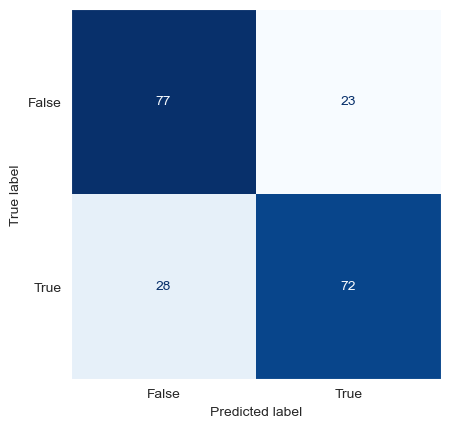

In [32]:
model_loaded = model
# predict probabilities for test set
y_pred = model_loaded.predict(X_test)

# compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# apply the threshold
threshold = 0.5
y_pred = (y_pred >= threshold).astype(int)
print(y_pred)

# Calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-Score: ', f1)

# Confusion matrix
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)
confusion_matrix_percent = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentages


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_percent, display_labels=[False, True])

# Plot confusion matrix without grid
cm_display.plot(include_values=True, cmap='Blues', xticks_rotation='horizontal', colorbar=False)
sns.set_style("darkgrid")
# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()

## 3.2 Оптимизация модели

In [3]:
X_train = credit_train.drop(['id', 'flag'], axis=1) # Features
y_train = credit_train['flag'] # Target variable

X_test = credit_test.drop(['id', 'flag'], axis=1) # Features
y_test = credit_test['flag'] # Target variable

In [4]:
def create_model():
    model = Sequential()
    model.add(Dense(60, activation='relu', input_dim=458))
    model.add(Dense(55, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(45, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(35, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [5]:
# An early stop is created to prevent overfitting in the model.
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [6]:
from tensorflow.keras import backend as K

class F1Score(tf.keras.metrics.Metric):

    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2*((precision*recall)/(precision+recall+K.epsilon()))

    def reset_states(self):
        self.precision.reset_state()
        self.recall.reset_state()

In [8]:
from tensorflow.keras.metrics import Precision, Recall

models = {}

optimizer_list = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adamax']


for i, optimizer in enumerate(optimizer_list):
    start_time = time.time()
    model = create_model()  # Create a new model instance for each optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), F1Score()])
    history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test),
                        verbose=1, callbacks=[early_stop])
    models['model{}'.format(i)] = history
    end_time = time.time()
    training_time = end_time - start_time
    print("Training time: {:.2f} seconds".format(training_time))

Epoch 1/50
25677/25677 [==============================] - ETA: 0s - loss: 0.6385 - accuracy: 0.6269 - precision_2: 0.6342 - recall_2: 0.5997 - f1_score: 0.6165

C:\Users\Tseh\anaconda3\lib\site-packages\keras\engine\training.py:2448: UserWarning:

Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.



25677/25677 [==============================] - 45s 2ms/step - loss: 0.6385 - accuracy: 0.6269 - precision_2: 0.6342 - recall_2: 0.5997 - f1_score: 0.6165 - val_loss: 0.6259 - val_accuracy: 0.6437 - val_precision_2: 0.6113 - val_recall_2: 0.7898 - val_f1_score: 0.6892
Epoch 2/50
25677/25677 [==============================] - 37s 1ms/step - loss: 0.5916 - accuracy: 0.6757 - precision_2: 0.6918 - recall_2: 0.6337 - f1_score: 0.6615 - val_loss: 0.5768 - val_accuracy: 0.6887 - val_precision_2: 0.6906 - val_recall_2: 0.6839 - val_f1_score: 0.6872
Epoch 3/50
25677/25677 [==============================] - 37s 1ms/step - loss: 0.5696 - accuracy: 0.6944 - precision_2: 0.7115 - recall_2: 0.6539 - f1_score: 0.6815 - val_loss: 0.5620 - val_accuracy: 0.7007 - val_precision_2: 0.7459 - val_recall_2: 0.6089 - val_f1_score: 0.6705
Epoch 4/50
25677/25677 [==============================] - 37s 1ms/step - loss: 0.5575 - accuracy: 0.7037 - precision_2: 0.7222 - recall_2: 0.6619 - f1_score: 0.6907 - val_los

C:\Users\Tseh\anaconda3\lib\site-packages\keras\engine\training.py:2448: UserWarning:

Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.



25677/25677 [==============================] - 46s 2ms/step - loss: 0.5779 - accuracy: 0.6882 - precision_4: 0.7036 - recall_4: 0.6502 - f1_score: 0.6758 - val_loss: 0.5583 - val_accuracy: 0.7078 - val_precision_4: 0.7429 - val_recall_4: 0.6359 - val_f1_score: 0.6853
Epoch 2/50
25677/25677 [==============================] - 39s 2ms/step - loss: 0.5489 - accuracy: 0.7132 - precision_4: 0.7290 - recall_4: 0.6785 - f1_score: 0.7029 - val_loss: 0.5494 - val_accuracy: 0.7132 - val_precision_4: 0.7708 - val_recall_4: 0.6070 - val_f1_score: 0.6791
Epoch 3/50
25677/25677 [==============================] - 38s 1ms/step - loss: 0.5445 - accuracy: 0.7174 - precision_4: 0.7300 - recall_4: 0.6900 - f1_score: 0.7094 - val_loss: 0.5442 - val_accuracy: 0.7185 - val_precision_4: 0.7291 - val_recall_4: 0.6956 - val_f1_score: 0.7120
Epoch 4/50
25677/25677 [==============================] - 38s 1ms/step - loss: 0.5468 - accuracy: 0.7173 - precision_4: 0.7239 - recall_4: 0.7026 - f1_score: 0.7131 - val_los

C:\Users\Tseh\anaconda3\lib\site-packages\keras\engine\training.py:2448: UserWarning:

Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.



25677/25677 [==============================] - 47s 2ms/step - loss: 0.5721 - accuracy: 0.6900 - precision_6: 0.7057 - recall_6: 0.6516 - f1_score: 0.6776 - val_loss: 0.5479 - val_accuracy: 0.7105 - val_precision_6: 0.7098 - val_recall_6: 0.7123 - val_f1_score: 0.7111
Epoch 2/50
25677/25677 [==============================] - 39s 2ms/step - loss: 0.5407 - accuracy: 0.7172 - precision_6: 0.7346 - recall_6: 0.6799 - f1_score: 0.7062 - val_loss: 0.5382 - val_accuracy: 0.7196 - val_precision_6: 0.7522 - val_recall_6: 0.6553 - val_f1_score: 0.7004
Epoch 3/50
25677/25677 [==============================] - 39s 2ms/step - loss: 0.5311 - accuracy: 0.7245 - precision_6: 0.7463 - recall_6: 0.6803 - f1_score: 0.7118 - val_loss: 0.5376 - val_accuracy: 0.7221 - val_precision_6: 0.7226 - val_recall_6: 0.7213 - val_f1_score: 0.7220
Epoch 4/50
25677/25677 [==============================] - 40s 2ms/step - loss: 0.5255 - accuracy: 0.7287 - precision_6: 0.7509 - recall_6: 0.6845 - f1_score: 0.7162 - val_los

C:\Users\Tseh\anaconda3\lib\site-packages\keras\engine\training.py:2448: UserWarning:

Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.



25677/25677 [==============================] - 54s 2ms/step - loss: 0.6933 - accuracy: 0.4972 - precision_8: 0.4962 - recall_8: 0.3780 - f1_score: 0.4291 - val_loss: 0.6931 - val_accuracy: 0.5033 - val_precision_8: 0.5065 - val_recall_8: 0.2711 - val_f1_score: 0.3531
Epoch 2/50
25677/25677 [==============================] - 50s 2ms/step - loss: 0.6931 - accuracy: 0.5059 - precision_8: 0.5056 - recall_8: 0.5237 - f1_score: 0.5145 - val_loss: 0.6930 - val_accuracy: 0.5080 - val_precision_8: 0.5059 - val_recall_8: 0.7050 - val_f1_score: 0.5891
Epoch 3/50
25677/25677 [==============================] - 50s 2ms/step - loss: 0.6926 - accuracy: 0.5182 - precision_8: 0.5117 - recall_8: 0.7968 - f1_score: 0.6232 - val_loss: 0.6920 - val_accuracy: 0.5279 - val_precision_8: 0.5176 - val_recall_8: 0.8253 - val_f1_score: 0.6362
Epoch 4/50
25677/25677 [==============================] - 51s 2ms/step - loss: 0.6907 - accuracy: 0.5397 - precision_8: 0.5266 - recall_8: 0.7874 - f1_score: 0.6311 - val_los

C:\Users\Tseh\anaconda3\lib\site-packages\keras\engine\training.py:2448: UserWarning:

Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.



25677/25677 [==============================] - 59s 2ms/step - loss: 0.5898 - accuracy: 0.6786 - precision_10: 0.6995 - recall_10: 0.6261 - f1_score: 0.6608 - val_loss: 0.5618 - val_accuracy: 0.7035 - val_precision_10: 0.7064 - val_recall_10: 0.6965 - val_f1_score: 0.7014
Epoch 2/50
25677/25677 [==============================] - 48s 2ms/step - loss: 0.5497 - accuracy: 0.7114 - precision_10: 0.7312 - recall_10: 0.6683 - f1_score: 0.6984 - val_loss: 0.5434 - val_accuracy: 0.7164 - val_precision_10: 0.7435 - val_recall_10: 0.6612 - val_f1_score: 0.6999
Epoch 3/50
25677/25677 [==============================] - 51s 2ms/step - loss: 0.5375 - accuracy: 0.7203 - precision_10: 0.7405 - recall_10: 0.6783 - f1_score: 0.7081 - val_loss: 0.5425 - val_accuracy: 0.7176 - val_precision_10: 0.7093 - val_recall_10: 0.7377 - val_f1_score: 0.7232
Epoch 4/50
25677/25677 [==============================] - 47s 2ms/step - loss: 0.5303 - accuracy: 0.7255 - precision_10: 0.7462 - recall_10: 0.6835 - f1_score: 0.

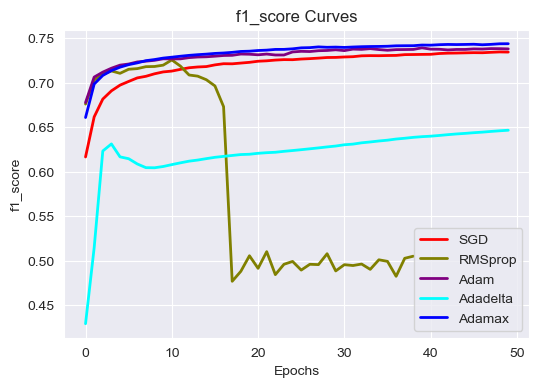

In [11]:

# Accuracy curve
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.figure(figsize=[6,4])
plt.plot(models['model0'].history['f1_score'], 'red', linewidth=2.0,label="SGD")
plt.plot(models['model1'].history['f1_score'], 'olive', linewidth=2.0,label="RMSprop")
plt.plot(models['model2'].history['f1_score'], 'purple', linewidth=2.0,label="Adam")
plt.plot(models['model3'].history['f1_score'], 'cyan', linewidth=2.0,label="Adadelta")
plt.plot(models['model4'].history['f1_score'], 'blue', linewidth=2.0,label="Adamax")


plt.legend(fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('f1_score', fontsize=10)
plt.title('f1_score Curves', fontsize=12)
plt.savefig('Figure.png')

## 3.3 Оценка моделей

ROC AUC score: 0.7550852810532186
[1 0 0 ... 0 0 0]
Accuracy:  0.755077600140206
Precision:  0.7707056363119982
Recall:  0.7263988864391849
F1-Score:  0.7478966331096758


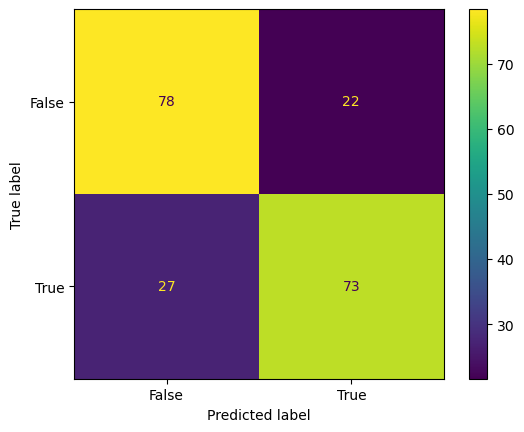

In [23]:
model_loaded = models[4]
# predict probabilities for test set
y_pred = model_loaded.predict(X_test)

# compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# apply the threshold
threshold = 0.5
y_pred = (y_pred >= threshold).astype(int)
print(y_pred)

# Calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-Score: ', f1)

# Confusion matrix
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)
confusion_matrix_percent = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentages

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_percent, display_labels=[False, True])

cm_display.plot()
plt.show()